In [61]:
# Install Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Read in data 
cab_df = pd.read_csv("cab_rides.csv")

In [31]:
# Data description 
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [32]:
# Identify and drop missing values 
print(cab_df.isnull().sum())
cab_df.dropna(inplace=True)
print(cab_df.isnull().sum())

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64
distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64


In [33]:
# Drop unnecessary columns (id & product_id)
cab_df.columns
cab_df = cab_df[['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'name']]

cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL


In [34]:
# Convert time_stamp column from unix to date, time, weekday, hour, and time_of_day
cab_df["rounded_timestamp"] = cab_df["time_stamp"] / 1000
cab_df["rounded_timestamp"] = cab_df["rounded_timestamp"].apply(np.floor)

cab_df["date"] = cab_df["rounded_timestamp"].apply(lambda x : datetime.fromtimestamp(x).date())
cab_df["time"] = cab_df["rounded_timestamp"].apply(lambda x: datetime.fromtimestamp(x).time())
cab_df['weekday'] = cab_df['date'].apply(lambda x: x.weekday())
cab_df["weekday"] = cab_df["weekday"].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
cab_df['hour'] = cab_df['time'].apply(lambda time: time.hour)

cab_df.loc[(cab_df.hour >= 6) & (cab_df.hour < 12) , 'time_of_day'] = 'Morning'
cab_df.loc[(cab_df.hour >= 12) & (cab_df.hour < 15) , 'time_of_day'] = 'Afternoon'
cab_df.loc[(cab_df.hour >= 15) & (cab_df.hour < 18) , 'time_of_day'] = 'Evening'
cab_df.loc[(cab_df.hour >= 18) | (cab_df.hour < 6) , 'time_of_day'] = 'Night'

cab_df = cab_df[['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'name', 'date', 'time', 'weekday', 'hour', 'time_of_day']]
cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,date,time,weekday,hour,time_of_day
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16,04:30:07,Sunday,4,Night
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-26,21:00:23,Monday,21,Night
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-27,20:00:22,Tuesday,20,Night
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-29,23:53:02,Thursday,23,Night
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-28,22:49:20,Wednesday,22,Night


In [35]:
# Identify rideshare companies 
cab_df['cab_type'].value_counts()
# Separate Lyft and Uber data into separate dfs 
uber_df = cab_df[cab_df['cab_type'] =="Uber"]
lyft_df = cab_df[cab_df['cab_type'] =="Lyft"]


330568

In [36]:
# Determine numeric values for correlation 
lyft_df = cab_df[cab_df["cab_type"] == "Lyft"]
uber_ds = cab_df[cab_df['cab_type'] == "Uber"]

uber_ds_corr = uber_ds[["distance", "price", "surge_multiplier"]]
lyft_df_corr = lyft_df[["distance", "price", "surge_multiplier"]]

<AxesSubplot:>

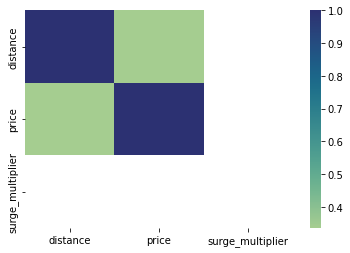

In [45]:
# Correlation heatmap for Uber 
sns.heatmap(uber_ds_corr.corr(), cmap="crest")

<AxesSubplot:>

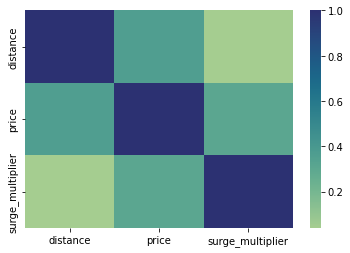

In [46]:
# Correlation heatmap for Lyft
sns.heatmap(lyft_df_corr.corr() , cmap="crest")

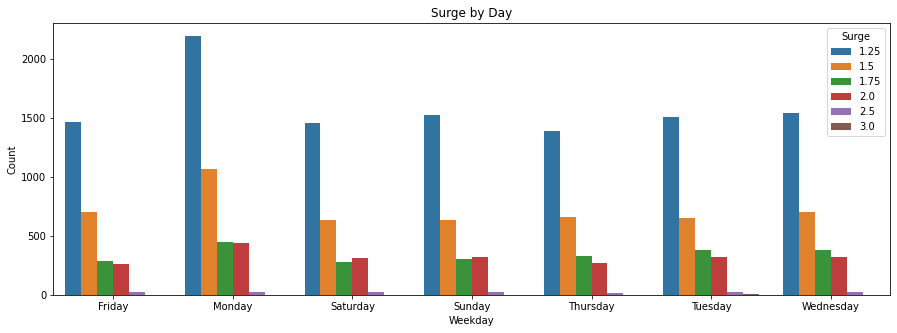

In [53]:
# Only include data with a surge multiplier of greater than 1 
high_surge_dataset = lyft_df[lyft_df["surge_multiplier"]> 1]

# Create new df with only weekday, surge multiplier, and count value 
t_high_surge = pd.DataFrame(high_surge_dataset.groupby(["weekday", "surge_multiplier"]).size().reset_index())
t_high_surge.columns = ["Weekday", "Surge", "Count"]

# Plot data 
plt.figure(figsize=(15, 5))
sns.barplot(x="Weekday", y="Count", hue="Surge", data=t_high_surge).set_title("Surge by Day");

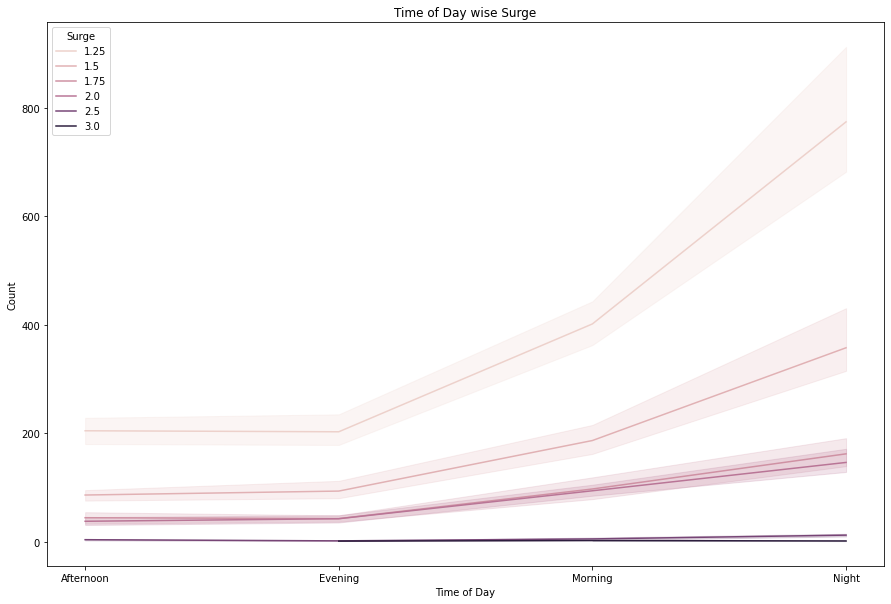

In [92]:
# Create new df with only weekday, surge multiplier, time of day, and count value 
td_high_surge = pd.DataFrame(high_surge_dataset.groupby(["weekday", "surge_multiplier","time_of_day"]).size().reset_index())
td_high_surge.columns = ["Weekday", "Surge", "Time of Day", "Count"]

# Plot data
plt.figure(figsize=(15, 10))
sns.lineplot(x="Time of Day", y="Count", hue="Surge", data=td_high_surge).set_title("Time of Day wise Surge");

In [96]:
uber_dis_price_surge

,distance,surge_multiplier,price
12,1.11,1.0,12.0
13,1.11,1.0,16.0
14,1.11,1.0,7.5
15,1.11,1.0,7.5
16,1.11,1.0,26.0
...,...,...,...
693065,1.00,1.0,9.5
693066,1.00,1.0,13.0
693067,1.00,1.0,9.5
693069,1.00,1.0,27.0


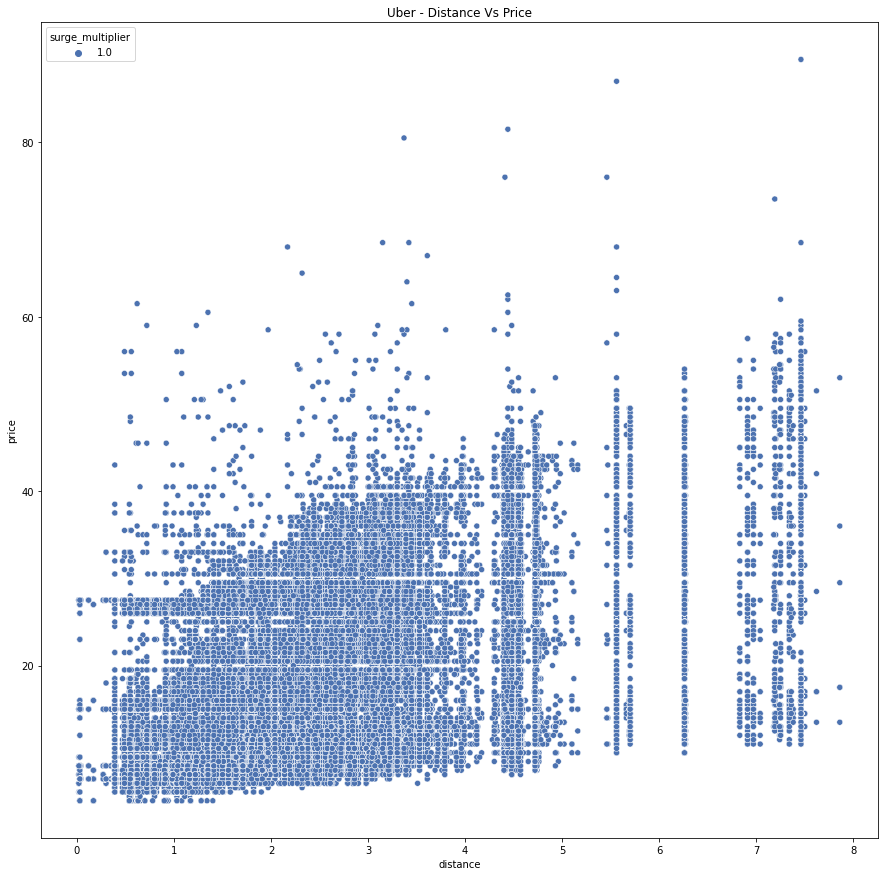

In [100]:
# Subset data by distance, surge, and price 
uber_dis_price_surge = uber_df[['distance', 'surge_multiplier', 'price']]
lyft_dis_price_surge = lyft_df[['distance', 'surge_multiplier', 'price']]

# Plot Uber data 
plt.figure(figsize=(15, 15))
sns.scatterplot(data=uber_dis_price_surge, x="distance", y="price", hue="surge_multiplier", palette="deep").set_title("Uber - Distance Vs Price");

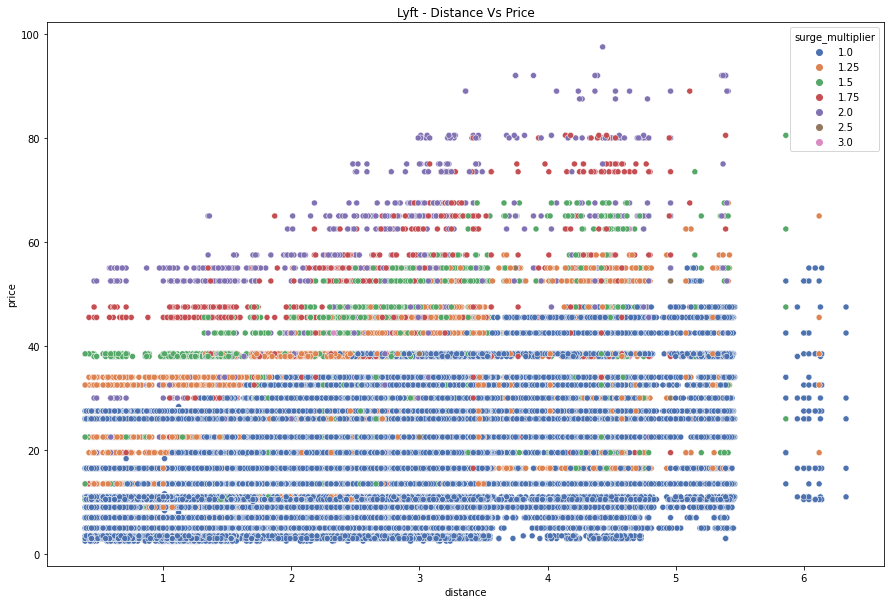

In [58]:
# Plot Lyft data
plt.figure(figsize=(15, 10))
sns.scatterplot(data=lyft_dis_price_surge, x="distance", y="price", hue="surge_multiplier", palette="deep").set_title("Lyft - Distance Vs Price");

In [101]:
# Group by source/starting point and destination 
uber_s_d_df= uber_df.groupby(['source', "destination"]).size().reset_index()
uber_s_d_df.columns = ["source", "destination", "count"]
uber_s_d_df.sort_values("count", inplace=True, ascending = False)

uber_five_most = uber_s_d_df.iloc[0:5, ]
uber_five_most["Source - Destination"] = uber_s_d_df["source"] + " - " + uber_s_d_df["destination"]

                source         destination  count
29  Financial District       South Station   4908
56       South Station  Financial District   4908
36           North End            Back Bay   4866
3             Back Bay           North End   4866
67            West End              Fenway   4830


In [63]:
# Combine Source and Destination 
uber_five_most = uber_five_most[["Source - Destination", "count"]]
uber_five_most

,Source - Destination,count
29,Financial District - South Station,4908
56,South Station - Financial District,4908
36,North End - Back Bay,4866
3,Back Bay - North End,4866
67,West End - Fenway,4830


In [64]:
# Group by source/starting point and destination 
lyft_s_d_df= lyft_df.groupby(['source', "destination"]).size().reset_index()
lyft_s_d_df.columns = ["source", "destination", "count"]
lyft_s_d_df.sort_values("count", inplace=True, ascending = False)

lyft_five_most = lyft_s_d_df.iloc[0:5, ]
lyft_five_most["Source - Destination"] = lyft_s_d_df["source"] + " - " + lyft_s_d_df["destination"]

In [65]:
# Combine Source and Destination 
lyft_five_most = lyft_five_most[["Source - Destination", "count"]]
lyft_five_most

,Source - Destination,count
56,South Station - Financial District,4626
29,Financial District - South Station,4626
36,North End - Back Bay,4548
3,Back Bay - North End,4548
67,West End - Fenway,4530


In [66]:
# Filter data by surge multiplier 
high_surge_rows = cab_df[cab_df["surge_multiplier"] >= 2]
loc_wise_surge = high_surge_rows.groupby(["source", "destination"]).size().reset_index()
loc_wise_surge.columns=["source", "destination", "count"]
loc_wise_surge.sort_values(inplace=True, ascending=False, by=["count"])

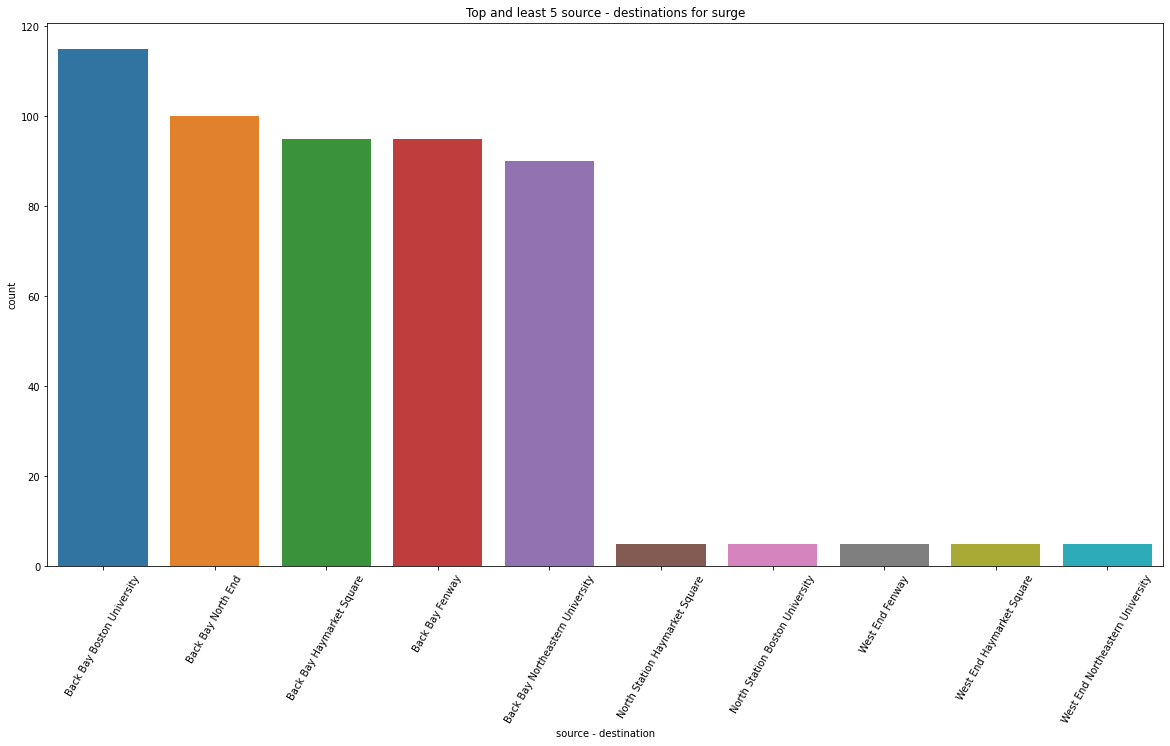

In [104]:
# Specify highest and lowed surges as objects 
highest_destination_surge = loc_wise_surge.head(5)
lowest_destination_surge = loc_wise_surge.tail(5)

# Highest_destination_surge
destination_surge_df = highest_destination_surge.append(lowest_destination_surge, ignore_index=True)
destination_surge_df["source - destination"] = destination_surge_df["source"] + " " + destination_surge_df["destination"]

# Plot data 
plt.figure(figsize=(20, 10))
g = sns.barplot(data = destination_surge_df, x = "source - destination", y = "count")
g.set_title("Top and least 5 source - destinations for surge")
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=60);

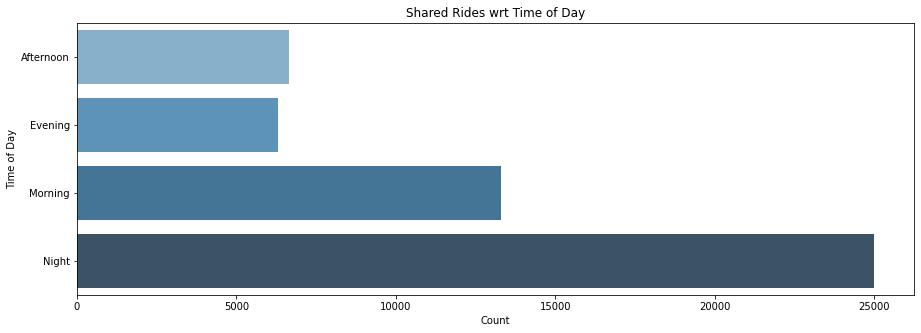

In [69]:
# Filter data by shared rides only
lyft_shared_rides_df = lyft_df[lyft_df["name"] == "Shared"]
lyft_shared_ride_td = lyft_shared_rides_df.groupby(["name", "time_of_day"]).size().reset_index()
lyft_shared_ride_td.columns = ["Name", "Time of Day", "Count"]

# Plot data 
plt.figure(figsize=(15, 5))
sns.barplot(y="Time of Day", x="Count", data=lyft_shared_ride_td, palette="Blues_d", orient ='h' ).set_title("Shared Rides wrt Time of Day");

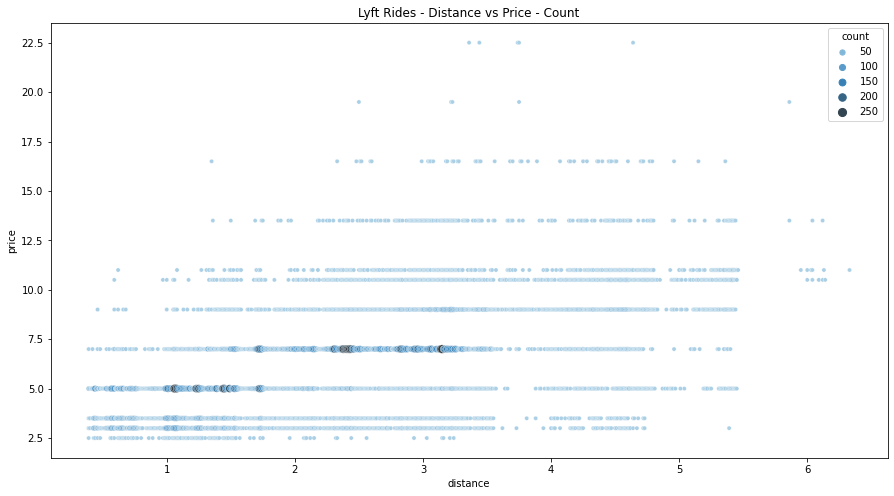

In [105]:
# Include price in df 
lyft_shared_rides_distance_price = lyft_shared_rides_df.groupby(["name", "distance", "price"]).size().reset_index()
lyft_shared_rides_distance_price.columns = ["name", "distance", "price", "count"]

# Plot data 
plt.figure(figsize=(15, 8))
sns.scatterplot(data = lyft_shared_rides_distance_price, palette="Blues_d" , x = "distance", y="price", hue="count", size="count").set_title("Lyft Rides - Distance vs Price - Count");

In [74]:
# Read in data 
weather_df = pd.read_csv("weather.csv")
cab_weather_df = pd.read_csv("cab_rides.csv")

In [75]:
# Adjust timestamp column
cab_weather_df["time_stamp"] = cab_weather_df["time_stamp"] / 1000
cab_weather_df["time_stamp"] = cab_weather_df["time_stamp"].apply(np.floor)
cab_weather_df["time_stamp"] = cab_weather_df["time_stamp"].astype(int)

In [78]:
# Merge weather and cab data 
merged_data = pd.merge(weather_df, cab_weather_df, on=["source", "time_stamp"])

# Filter data to temp, source and count
tmp_merged_data = merged_data[['temp', 'source', 'time_stamp', 'cab_type', 'destination',
       'surge_multiplier',  'name']]
tmp_merged_data_g =  tmp_merged_data.groupby(["temp", "source"]).size().reset_index()
tmp_merged_data_g.columns = ["temp", "source", "count"]

# Plot data 
plt.figure(figsize=(15, 10))
sns.scatterplot( data = tmp_merged_data_g, x ="temp", y = "count", size="count", hue="count");

In [80]:
# Filter df to source, time stamp, cab type and rain 
rain_merged_data = merged_data[['source', 'time_stamp', 'cab_type',  "rain"]]
# Replace na values with zero 
rain_merged_data["rain"] = rain_merged_data["rain"].fillna(value=0)
# Organize by rain column 
t_rain = rain_merged_data.groupby(["rain"]).size().reset_index()
t_rain.columns=["rain", "count"]

# Plot data 
plt.figure(figsize=(15, 10))
sns.scatterplot(data = t_rain, x = "rain", y="count", hue="count", size="count")

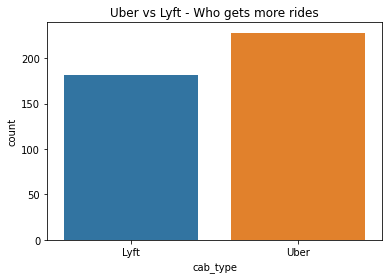

In [108]:
# Filter where rain is not zero 
only_rain_data = rain_merged_data[rain_merged_data["rain"] != 0]
# Organize by Uber or Lyft 
c_only_rain = only_rain_data.groupby(["cab_type"]).size().reset_index()
c_only_rain.columns = ["cab_type", "count"]

# Plot data 
sns.barplot(x ="cab_type", y="count", data=c_only_rain).set_title("Uber vs Lyft - Who gets more rides");

**Citation**: https://www.analyticsvidhya.com/blog/2021/06/uber-and-lyft-cab-prices-data-analysis-and-visualization/ <br>
**Data**: https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices        